In [324]:
import numpy as np
import matplotlib.pyplot as plt
import math

C = 48.5e-9
R = 22
L = 3.186e-3
W = 160
VIN = 1
PI = 3.141592653589793

print(R/(2*L))
print(1/(math.sqrt(L*C)))

3452.6051475204017
80446.3316302584


0.000501319898985502 0.12018545180309886 0.12183921432263144


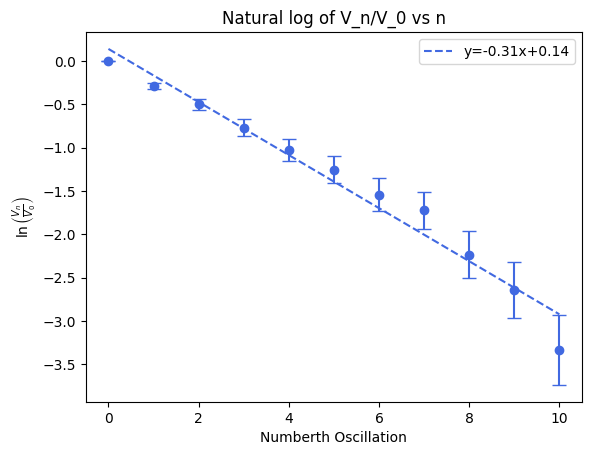

In [305]:
t = [9,145,228,304,380,460,540,616,696,776,852]
xpoints = np.array([0,1,2,3,4,5,6,7,8,9,10])
ypointslin = [5.6,4.2,3.4,2.6,2,1.6,1.2,1,0.6,0.4,0.2]
ypointslog = []
n = len(ypointslin)

#Error calculation
lst1 = [0.04/i for i in t]
Deltax = sum(lst1)/len(lst1)
lst2 = [0.05/i for i in ypointslin]
Deltay = 2*sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2+0.02**2) 
print(Deltax,Deltay,err) 

for i in range(0,n):
    x = math.log(ypointslin[i]/ypointslin[0])
    ypointslog.append(x)

ypointslog = np.array(ypointslog)
    
c = np.polyfit(xpoints, ypointslog,1)
p = np.poly1d(c)

xp = np.linspace(min(xpoints), max(xpoints), 100)

plt.title('Natural log of V_n/V_0 vs n')
plt.ylabel(r"$\ln\left({\frac{V_n}{V_0}}\right)$")
plt.xlabel("Numberth Oscillation")
plt.plot(xpoints,ypointslog, marker='o', linestyle='',color= 'royalblue')
plt.plot(xp, p(xp), linestyle='--',color= 'royalblue', label=f'y={round(c[0],2)}x+{round(c[1],2)}')
plt.errorbar(xpoints,ypointslog,yerr=err*abs(ypointslog),capsize=5,fmt='none',color='royalblue')
plt.legend(loc="upper right")
plt.savefig("plot1.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [306]:
tnew = [i*10**-6 for i in t]
Texp = (max(tnew)-min(tnew))/(len(t)-1)
T = 2*PI*math.sqrt(L*C)  
err=(Texp-T)/T

print(Texp,T,err)

8.43e-05 7.810406242086845e-05 0.07932926133527303


In [307]:
#Thereotical Value for k
k = (R0+20)/(2*L)
print(f"The theoretical value for k is: {k}.")

#Experimental Value for k
kexp = -c[0]/T
print(f"The experimental value for k is {kexp}.")

errk = abs(((kexp-k)/k)*100)
print(errk)

The theoretical value for k is: 3923.4149403640927.
The experimental value for k is 3921.5950216360407.
0.0463860885405898


In [308]:
t5f = [22.4,21.6,23.2,21.6,20.8,19.2,17.6,16,14.4,12.6,10.4,5.6,2.4,8.8,11.2,12.8,15.2,13.6,12.8,14.4,14.4]
t5 = [15.2,15.2,15.2,14.4,13.6,11.2,10.4,8.8,6.4,3.2,0,2.4,4.8,8.8,9.6,10.4,11.2,12.8,12.8,12.8,12.8]
t1 = [18.4,16.8,16,16,14.4,13.6,12,8.8,7.2,4.8,0,4.8,5.6,10.4,9.6,10.4,11.2,12,12,13.6,14.4]
t10 = [14.4,14.4,12.8,11.2,10.4,9.6,8,6.4,4,2.4,0,3.2,4.8,6.4,6.4,8,9.6,11.2,11.2,12,10.4]

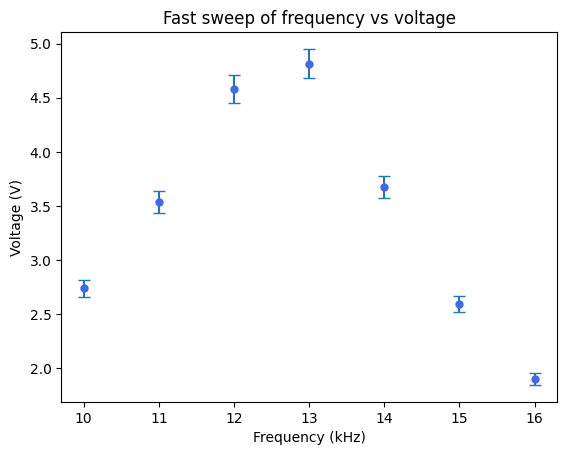

In [309]:
xpoints = np.array([10, 11, 12, 13, 14, 15, 16])
ypoints = np.array([2.74, 3.536, 4.582, 4.814, 3.675, 2.593, 1.902])

#Error calculations
lst1 = [(i*0.02+0.02)/i for i in ypoints]
Deltay = sum(lst1)/len(lst1)
err = math.sqrt(Deltay**2+0.01**2)

plt.title('Fast sweep of frequency vs voltage')
plt.ylabel("Voltage (V)")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints,yerr=err*abs(ypoints),fmt='none',capsize=4)
plt.plot(xpoints,ypoints, marker='o', linestyle='',color= 'royalblue',markersize=5)
plt.savefig("plot2.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

0.00980695729538786
0.020310451996682133 0.022919472462713846


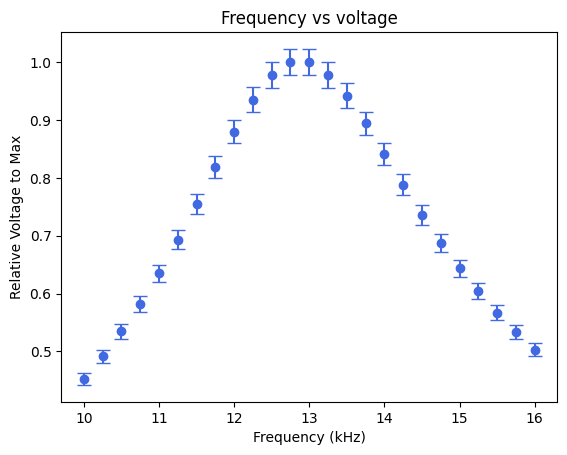

In [325]:
xpoints = np.array([10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75,15,15.25,15.5,15.75,16])
ypoints = np.array([41.9,45.5,49.5,53.9,58.8,64.2,69.9,75.8,81.5,86.6,90.5,92.6,92.6,90.6,87.2,82.8,77.9,73,68.1,63.7,59.6,55.9,52.5,49.4,46.6])
ypoints1 = np.array([i/max(ypoints) for i in ypoints])

xpoints = np.array([10,10.25,10.5,10.75,11,11.25,11.5,11.75,12,12.25,12.5,12.75,13,13.25,13.5,13.75,14,14.25,14.5,14.75,15,15.25,15.5,15.75,16])
q = [0.125/i for i in xpoints]
avg = sum(q)/len(q)
print(avg)


#Error Calculation
lst1 = [0.04/i for i in t5f]
Deltax = sum(lst1)/len(lst1)
lst2 = [(0.02*i+0.02)/i for i in ypoints]
Deltay = sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2+0.01**2)
print(Deltay,err)

plt.title('Frequency vs voltage')
plt.ylabel("Relative Voltage to Max")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints1,yerr=err*abs(ypoints1),capsize=5,fmt='none',color='royalblue')
plt.plot(xpoints,ypoints1, marker='o', linestyle='',color= 'royalblue')
plt.savefig("plot3.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

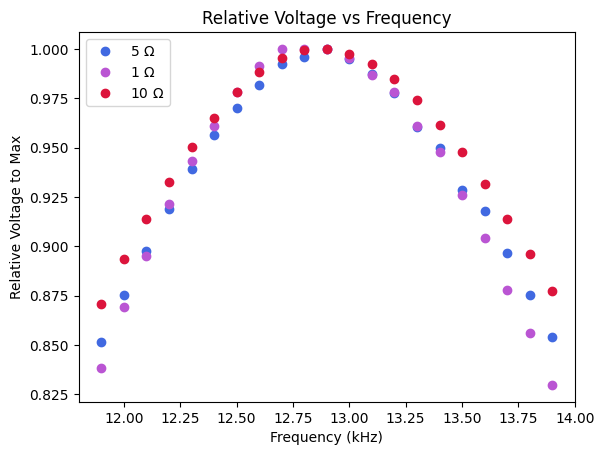

In [317]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints0 = np.array([79.8,82,84.1,86.1,88,89.6,90.9,92,93,93.3,93.7,93.2,92.5,91.6,90,89,87,86,84,82,80])
ypoints1 = np.array([19.2,19.9,20.5,21.1,21.6,22,22.4,22.7,22.9,22.9,22.9,22.8,22.6,22.4,22,21.7,21.2,20.7,20.1,19.6,19])
ypoints2 = np.array([147.7,151.5,155,158.2,161.2,163.7,165.9,167.6,168.8,169.5,169.6,169.2,168.3,167,165.2,163.1,160.7,158,155,152,148.8])

ypoints00 = [i/max(ypoints0) for i in ypoints0]
ypoints11 = [i/max(ypoints1) for i in ypoints1]
ypoints22 = [i/max(ypoints2) for i in ypoints2]

plt.title("Relative Voltage vs Frequency")
plt.ylabel("Relative Voltage to Max")
plt.xlabel("Frequency (kHz)")
plt.plot(xpoints,ypoints00, marker='o', linestyle='',color= 'royalblue',label = r"5 $\Omega$")
plt.plot(xpoints,ypoints11, marker='o', linestyle='',color= 'mediumorchid',label= r"1 $\Omega$")
plt.plot(xpoints,ypoints22, marker='o', linestyle='',color= 'crimson', label = r"10 $\Omega$")
plt.legend(loc='upper left')
plt.savefig("plot4.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

0.023146235400065614


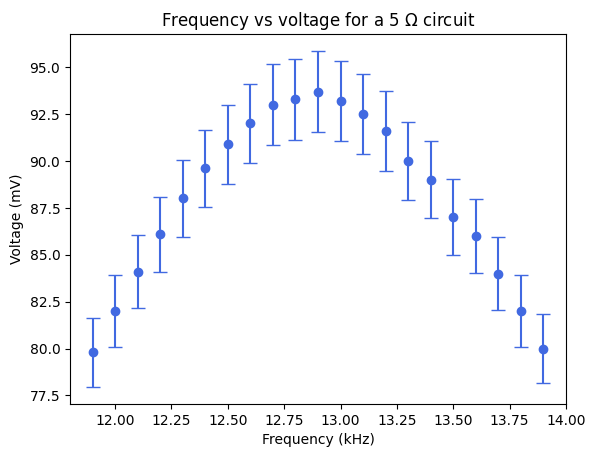

In [312]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints = np.array([79.8,82,84.1,86.1,88,89.6,90.9,92,93,93.3,93.7,93.2,92.5,91.6,90,89,87,86,84,82,80])

#Error Calculation
lst1 = [0.04/i for i in t5 if i != 0]
Deltax = sum(lst1)/(len(lst1)-1)
lst2 = [(0.02*i+0.02)/i for i in ypoints]
Deltay = sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2+0.01**2)
print(err)

plt.title(r'Frequency vs voltage for a 5 $\Omega$ circuit')
plt.ylabel("Voltage (mV)")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints,yerr=err*abs(ypoints),capsize=5,fmt='none',color='royalblue')
plt.plot(xpoints,ypoints, marker='o', linestyle='',color= 'royalblue')
plt.savefig("plot5.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

0.02135897882802519


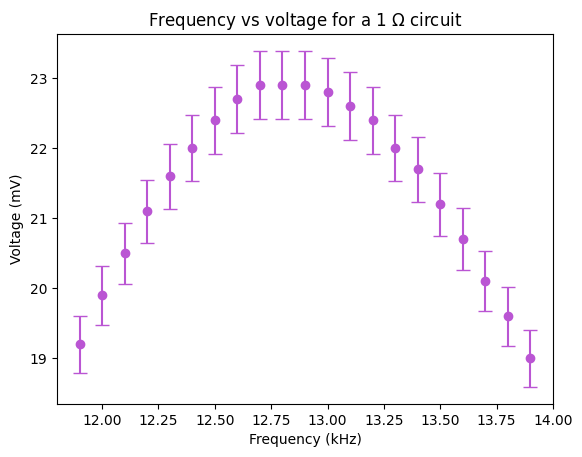

In [313]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints = np.array([19.2,19.9,20.5,21.1,21.6,22,22.4,22.7,22.9,22.9,22.9,22.8,22.6,22.4,22,21.7,21.2,20.7,20.1,19.6,19])

#Error Calculation
lst1 = [0.04/i for i in t1 if i != 0]
Deltax = sum(lst1)/(len(lst1)-1)
lst2 = [(0.02*i+0.02)/i for i in ypoints]
Deltay = sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2)
print(err)

plt.title(r'Frequency vs voltage for a 1 $\Omega$ circuit')
plt.ylabel("Voltage (mV)")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints,yerr=err*abs(ypoints),capsize=5,fmt='none',color='mediumorchid')
plt.plot(xpoints,ypoints, marker='o', linestyle='',color= 'mediumorchid')
plt.savefig("plot6.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

0.023272807557185915


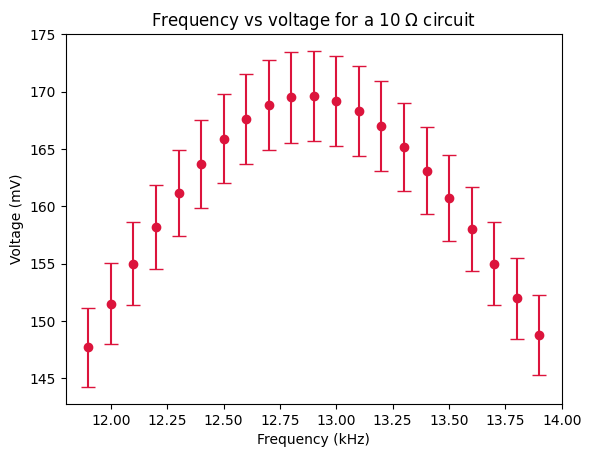

In [314]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints = np.array([147.7,151.5,155,158.2,161.2,163.7,165.9,167.6,168.8,169.5,169.6,169.2,168.3,167,165.2,163.1,160.7,158,155,152,148.8])

#Error Calculation
lst1 = [0.04/i for i in t10 if i != 0]
Deltax = sum(lst1)/(len(lst1)-1)
lst2 = [(0.02*i+0.02)/i for i in ypoints]
Deltay = sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2+0.01**2)
print(err)

plt.title(r'Frequency vs voltage for a 10 $\Omega$ circuit')
plt.ylabel("Voltage (mV)")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints,yerr=err*abs(ypoints),capsize=5,fmt='none',color='crimson')
plt.plot(xpoints,ypoints, marker='o', linestyle='',color= 'crimson')
plt.savefig("plot7.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

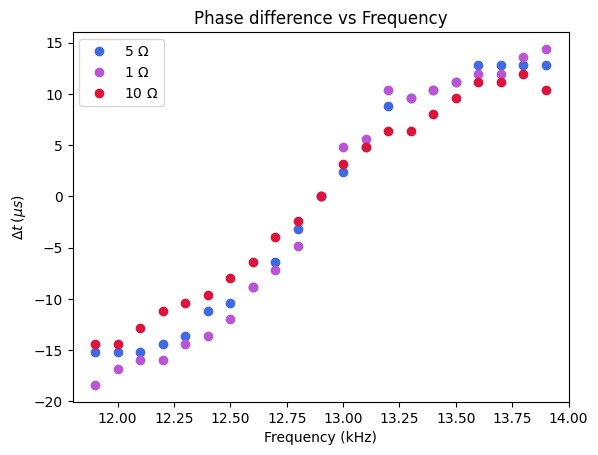

In [315]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints0 = np.array([-15.2,-15.2,-15.2,-14.4,-13.6,-11.2,-10.4,-8.8,-6.4,-3.2,0,2.4,4.8,8.8,9.6,10.4,11.2,12.8,12.8,12.8,12.8])
ypoints1 = np.array([-18.4,-16.8,-16,-16,-14.4,-13.6,-12,-8.8,-7.2,-4.8,0,4.8,5.6,10.4,9.6,10.4,11.2,12,12,13.6,14.4])
ypoints2 = np.array([-14.4,-14.4,-12.8,-11.2,-10.4,-9.6,-8,-6.4,-4,-2.4,0,3.2,4.8,6.4,6.4,8,9.6,11.2,11.2,12,10.4])

plt.title(r'Phase difference vs Frequency')
plt.ylabel(r"$\Delta t \: (\mu s)$")
plt.xlabel("Frequency (kHz)")
plt.plot(xpoints,ypoints0, marker='o', linestyle='',color= 'royalblue',label=r"5 $\Omega$")
plt.plot(xpoints,ypoints1, marker='o', linestyle='',color= 'mediumorchid',label=r"1 $\Omega$")
plt.plot(xpoints,ypoints2, marker='o', linestyle='',color= 'crimson', label=r"10 $\Omega$")
plt.legend(loc="upper left")
plt.savefig("plot8.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()

0.06459903307718884


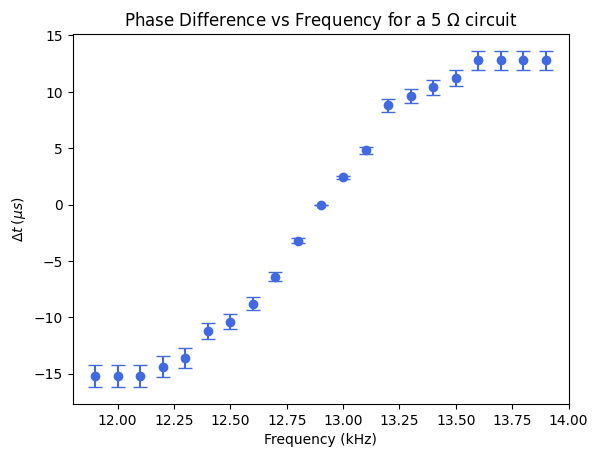

In [326]:
xpoints = np.array([11.9,12,12.1,12.2,12.3,12.4,12.5,12.6,12.7,12.8,12.9,13,13.1,13.2,13.3,13.4,13.5,13.6,13.7,13.8,13.9])
ypoints = np.array([-15.2,-15.2,-15.2,-14.4,-13.6,-11.2,-10.4,-8.8,-6.4,-3.2,0,2.4,4.8,8.8,9.6,10.4,11.2,12.8,12.8,12.8,12.8])

#Error Calculation
lst1 = [0.4/i for i in t10 if i != 0]
Deltax = sum(lst1)/(len(lst1)-1)
lst2 = [(0.02*i+0.02)/i for i in ypoints if i!= 0]
Deltay = sum(lst2)/len(lst2)
err = math.sqrt(Deltax**2+Deltay**2+0.01**2)
print(err)

plt.title(r'Phase Difference vs Frequency for a 5 $\Omega$ circuit')
plt.ylabel(r"$\Delta t \: (\mu s)$")
plt.xlabel("Frequency (kHz)")
plt.errorbar(xpoints,ypoints,yerr=err*abs(ypoints),capsize=5,fmt='none',color='royalblue')
plt.plot(xpoints,ypoints, marker='o', linestyle='',color= 'royalblue')
plt.savefig("plot9.pgf", bbox_inches='tight', pad_inches=0.1)
plt.show()